In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [48]:
df = pd.read_csv('../Data/grand_slams_cleaned.csv', parse_dates=[5])
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-580,Australian Open,Hard,128.0,G,1991-01-14,1,101222,1.0,Stefan Edberg,R,188.0,SWE,24.9,101432,0.0,Dimitri Poliakov,R,183.0,UKR,22.9,6-1 7-6(6) 6-2,5,R128,114.0,2.0,3.0,94.0,71.0,53.0,9.0,13.0,6.0,7.0,1.0,2.0,104.0,72.0,43.0,11.0,14.0,4.0,10.0,1.0,3889.0,162.0,202.0
1,1991-580,Australian Open,Hard,128.0,G,1991-01-14,2,100995,0.0,Eduardo Masso,L,178.0,BEL,27.0,101242,0.0,Brad Pearce,R,175.0,USA,24.8,6-7(4) 6-1 6-7(6) 6-3 8-6,5,R128,220.0,4.0,2.0,186.0,145.0,89.0,27.0,28.0,8.0,15.0,1.0,5.0,177.0,110.0,67.0,29.0,26.0,7.0,18.0,124.0,278.0,81.0,453.0
2,1991-580,Australian Open,Hard,128.0,G,1991-01-14,3,101138,0.0,Pat Cash,R,183.0,AUS,25.6,101120,0.0,Karel Novacek,R,190.0,CZE,25.7,6-2 6-4 6-1,5,R128,110.0,2.0,3.0,82.0,54.0,36.0,18.0,13.0,5.0,7.0,1.0,1.0,87.0,59.0,31.0,12.0,12.0,9.0,16.0,84.0,432.0,32.0,845.0
3,1991-580,Australian Open,Hard,128.0,G,1991-01-14,4,100870,0.0,Christo Van Rensburg,R,185.0,RSA,28.2,101256,0.0,Mark Kratzmann,L,178.0,AUS,24.6,6-3 6-1 7-5,5,R128,117.0,4.0,3.0,76.0,44.0,33.0,22.0,14.0,2.0,4.0,2.0,4.0,101.0,49.0,26.0,26.0,14.0,8.0,15.0,59.0,527.0,82.0,448.0
4,1991-580,Australian Open,Hard,128.0,G,1991-01-14,5,101731,0.0,Nuno Marques,L,190.0,POR,20.7,101416,0.0,Joao Cunha Silva,R,173.0,POR,23.1,4-6 6-4 1-6 6-3 6-4,5,R128,178.0,1.0,2.0,133.0,100.0,73.0,16.0,23.0,7.0,11.0,2.0,3.0,126.0,77.0,57.0,28.0,23.0,9.0,13.0,104.0,340.0,116.0,299.0


In [49]:
gdf = pd.DataFrame()
gdf['surface'] = df['surface']
gdf['round'] = df['round']
gdf['player1'] = df['winner_id']
gdf['w_name'] = df['winner_name']
gdf['player2'] = df['loser_id']
gdf['l_name'] = df['loser_name']
gdf['height_diff'] = df['winner_ht'] - df['loser_ht']
gdf['age_diff'] =  df['winner_age'] - df['loser_age']
gdf['rank_diff'] = df['loser_rank'] - df['winner_rank'] #(positive number means the winner had a better (lower) rank)
gdf['rank_point_diff'] = df['winner_rank_points'] - df['loser_rank_points']
gdf['seed_diff'] = df['loser_seed'] - df['winner_seed']

In [50]:
w_first_slam_age = df.groupby('winner_id')['winner_age'].min()
l_first_slam_age = df.groupby('loser_id')['loser_age'].min()

gdf['exp_diff']  = df['winner_id'].map(w_first_slam_age) - df['loser_id'].map(l_first_slam_age)

In [51]:
from collections import defaultdict

h2h_dict = defaultdict(int)
h2h_diff = []

for w, l in zip(df['winner_id'], df['loser_id']):
    wins = h2h_dict[(w, l)]
    loses = h2h_dict[(l, w)]
    h2h_diff.append(wins - loses)

    h2h_dict[(w, l)] += 1
    
gdf['h2h_diff'] = h2h_diff

In [52]:
from collections import defaultdict

w_last_wins = []
l_last_wins = []
win_count = defaultdict(int)

for w, l in zip(df['winner_name'], df['loser_name']):
    w_last_wins.append(win_count[w])
    l_last_wins.append(win_count[l])
    win_count[w] += 1

gdf['w_past_wins'] = w_last_wins
gdf['l_past_wins'] = l_last_wins
gdf['past_wins_diff'] = gdf['w_past_wins'] - gdf['l_past_wins']

In [53]:
df.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
16661,2024-560,Us Open,Hard,128.0,G,2024-08-26,222,126203,12.0,Taylor Fritz,R,196.0,USA,26.8,100644,4.0,Alexander Zverev,R,198.0,GER,27.3,7-6(2) 3-6 6-4 7-6(3),5,QF,206.0,12.0,5.0,128.0,81.0,66.0,25.0,21.0,2.0,4.0,14.0,4.0,145.0,103.0,77.0,20.0,22.0,11.0,13.0,12.0,3120.0,4.0,7035.0
16662,2024-560,Us Open,Hard,128.0,G,2024-08-26,223,126207,20.0,Frances Tiafoe,R,188.0,USA,26.5,105777,9.0,Grigor Dimitrov,R,191.0,BUL,33.2,6-3 6-7(5) 6-3 4-1 RET,5,QF,184.0,3.0,5.0,107.0,53.0,39.0,36.0,17.0,3.0,4.0,8.0,11.0,130.0,71.0,53.0,22.0,18.0,8.0,14.0,20.0,2120.0,9.0,3655.0
16663,2024-560,Us Open,Hard,128.0,G,2024-08-26,224,206173,1.0,Jannik Sinner,R,191.0,ITA,23.0,207733,25.0,Jack Draper,L,193.0,GBR,22.6,7-5 7-6(3) 6-2,5,SF,183.0,11.0,2.0,96.0,62.0,48.0,25.0,16.0,3.0,4.0,8.0,10.0,131.0,64.0,43.0,32.0,16.0,7.0,11.0,1.0,9360.0,25.0,1695.0
16664,2024-560,Us Open,Hard,128.0,G,2024-08-26,225,126203,12.0,Taylor Fritz,R,196.0,USA,26.8,126207,20.0,Frances Tiafoe,R,188.0,USA,26.5,4-6 7-5 4-6 6-4 6-1,5,SF,198.0,16.0,3.0,131.0,76.0,57.0,36.0,25.0,1.0,5.0,11.0,9.0,131.0,71.0,57.0,27.0,24.0,5.0,11.0,12.0,3120.0,20.0,2120.0
16665,2024-560,Us Open,Hard,128.0,G,2024-08-26,226,206173,1.0,Jannik Sinner,R,191.0,ITA,23.0,126203,12.0,Taylor Fritz,R,196.0,USA,26.8,6-3 6-4 7-5,5,F,136.0,6.0,5.0,85.0,43.0,38.0,20.0,15.0,5.0,7.0,10.0,4.0,90.0,53.0,36.0,16.0,16.0,6.0,12.0,1.0,9360.0,12.0,3120.0


In [54]:
gdf.tail()

,surface,round,player1,w_name,player2,l_name,height_diff,age_diff,rank_diff,rank_point_diff,seed_diff,exp_diff,h2h_diff,w_past_wins,l_past_wins,past_wins_diff
16661,Hard,QF,126203,Taylor Fritz,100644,Alexander Zverev,-2.0,-0.5,-8.0,-3915.0,-8.0,1.7,-1,51,101,-50
16662,Hard,QF,126207,Frances Tiafoe,105777,Grigor Dimitrov,-3.0,-6.7,-11.0,-1535.0,-11.0,0.8,0,47,96,-49
16663,Hard,SF,206173,Jannik Sinner,207733,Jack Draper,-2.0,0.4,24.0,7665.0,24.0,-1.1,0,59,13,46
16664,Hard,SF,126203,Taylor Fritz,126207,Frances Tiafoe,8.0,0.3,8.0,1000.0,8.0,2.5,1,52,48,4
16665,Hard,F,206173,Jannik Sinner,126203,Taylor Fritz,-5.0,-3.8,11.0,6240.0,11.0,0.2,0,60,53,7


# EDA

### Does height impacts winning?

skewness:  0.018153380791555734


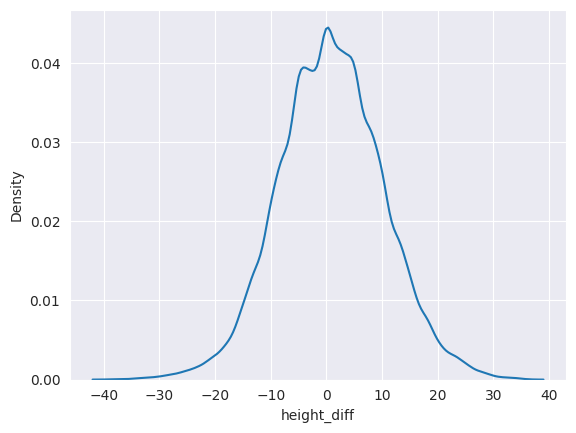

In [55]:
sns.kdeplot(gdf.height_diff)
print('skewness: ',gdf.height_diff.skew())

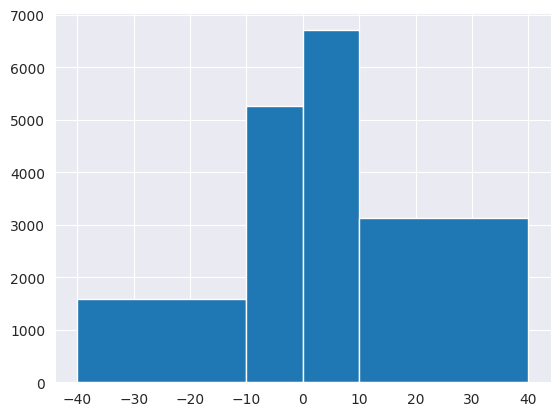

In [56]:
plt.hist(gdf.height_diff, bins=[-40, -10, 0, 10, 40])
plt.show()

In [57]:
print('win_counts_shorter_ht: ',gdf.query('height_diff < 0').shape[0])
print('win_counts_taller_ht: ', gdf.query('height_diff > 0').shape[0])

win_counts_shorter_ht:  6842
win_counts_taller_ht:  8031


It looks like taller people have some advantage. lets verify:

Null hypothesis (H₀): Mean height_diff = 0 (no height advantage)

Alt hypothesis (H₁): Mean height_diff > 0

In [58]:
from scipy import stats

sample = gdf.height_diff
tstat, pvalue = stats.ttest_1samp(sample, popmean=0, alternative='greater')
print(f"T-statistic: {tstat}")
print(f"P-value: {pvalue}")
if pvalue < 0.05:
    print('Taller players has advantage over shorter ones.')

T-statistic: 12.149855018725225
P-value: 3.994292378336974e-34
Taller players has advantage over shorter ones.


##### Surface Vs Heights

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
Clay,4181.0,0.489835,9.331980,-33.0,-5.0,0.0,7.0,33.0
Grass,4082.0,1.374816,9.264346,-38.0,-5.0,2.0,8.0,35.0
Hard,8403.0,0.832441,9.377571,-38.0,-5.0,0.0,7.0,35.0


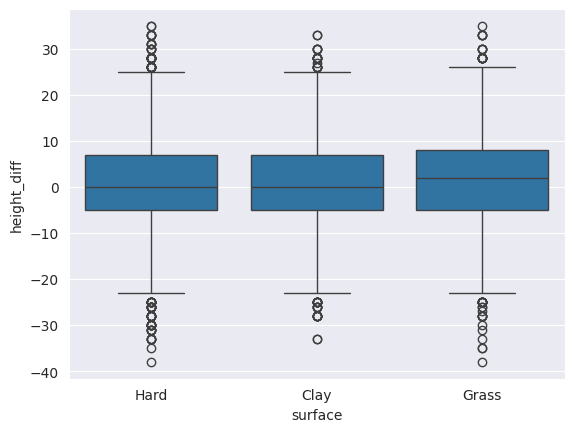

In [59]:
sns.boxplot(x='surface', y='height_diff', data=gdf)
gdf.groupby('surface')['height_diff'].describe()

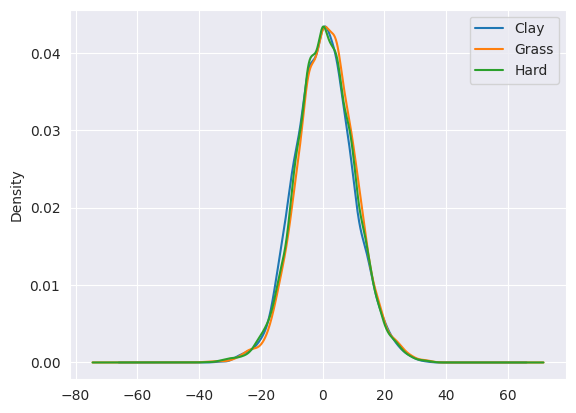

In [60]:
gdf.groupby('surface')['height_diff'].plot(kind='kde', legend=True)
plt.show()

It looks like taller guys wins more on grass.

*Check if height_diff distributions differ between surfaces*

Null hypothesis (H₀): All surfaces have the same height_diff distribution

Alt hypothesis (H₁): At least one surface differs

In [61]:
surface_groups = gdf.groupby('surface')['height_diff']
hard = surface_groups.get_group('Hard')
clay = surface_groups.get_group('Clay')
grass = surface_groups.get_group('Grass')
print(hard.shape, clay.shape, grass.shape)

from scipy.stats import kruskal

stat, p_val = kruskal(hard, clay, grass)
if p_val < 0.05:
    print('Surface does impact height_diff pattern')

(8403,) (4181,) (4082,)
Surface does impact height_diff pattern


**Confirmed: Taller players have an edge, especially on Grass.**

### Does age diffrence impacts match outcomes?

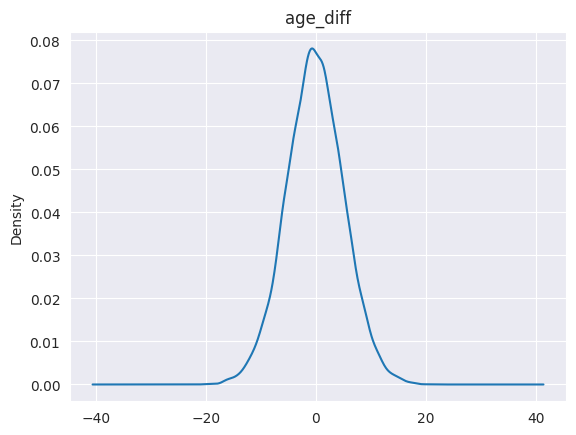

In [62]:
gdf['age_diff'].plot(kind='kde', title='age_diff')
plt.show()

In [63]:
gdf.age_diff.describe()

count    16666.000000
mean        -0.118949
std          5.231335
min        -20.100000
25%         -3.600000
50%         -0.200000
75%          3.400000
max         20.900000
Name: age_diff, dtype: float64

In [64]:
import pingouin as pg

ttest = pg.ttest(gdf.age_diff, 0)
ttest


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.935371,16665,two-sided,0.003336,"[-0.2, -0.04]",0.022738,0.648,0.835279


*age matters a bit — but not enough to make strong decisions from it alone.*

##### Age by Surface

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
Clay,4181.0,-0.269840,5.140753,-20.1,-3.7,-0.3,3.3,19.5
Grass,4082.0,-0.004336,5.257045,-19.0,-3.5,0.0,3.5,17.7
Hard,8403.0,-0.099548,5.262293,-19.7,-3.6,-0.1,3.3,20.9


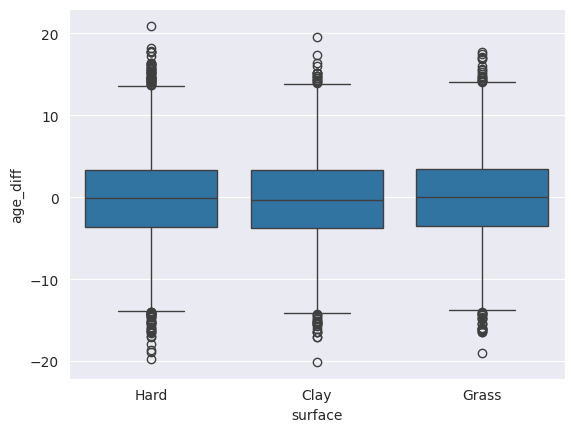

In [65]:
sns.set_style("darkgrid")
sns.boxplot(x='surface', y='age_diff', data=gdf)
gdf.groupby('surface')['age_diff'].describe()
# Most matches involve players within ~7 years of each other

In [66]:
kruskal_test = pg.kruskal(data=gdf, dv='age_diff', between='surface')
kruskal_test

,Source,ddof1,H,p-unc
Kruskal,surface,2,5.544808,0.062512


*overall younger players win slightly more, that effect is not surface-dependent.*

### Do more experienced players win more?

-kurtosis:  0.955871709773013 -skew:  0.061254738199933566


count    16666.000000
mean        -0.302886
std          3.437553
min        -18.400000
25%         -2.400000
50%         -0.300000
75%          1.800000
max         18.200000
Name: exp_diff, dtype: float64

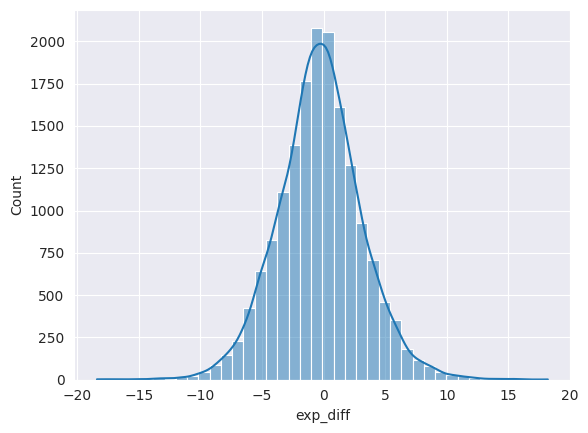

In [67]:
sns.histplot(gdf.exp_diff, kde=True, bins=40)
print('-kurtosis: ', gdf.exp_diff.kurtosis(), "-skew: ", gdf.exp_diff.skew())
gdf.exp_diff.describe()

In [68]:
print(gdf.query('exp_diff > 0')['exp_diff'].mean(),
gdf.query('exp_diff < 0')['exp_diff'].mean())

2.599190552016985 -2.771447856901789


In [69]:
pg.ttest(gdf.exp_diff, 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-11.374848,16665,two-sided,7.191437e-30,"[-0.36, -0.25]",0.088111,8.397e+25,NaN


*experience shows inverse relationship with winning.*

##### experience and round

,count,mean,std,min,25%,50%,75%,max
round,,,,,,,,
R128,8372.0,-0.231187,3.641460,-18.0,-2.5,-0.3,2.1,18.2
R64,4233.0,-0.431065,3.451652,-17.6,-2.6,-0.4,1.7,16.3
R32,2080.0,-0.383558,3.128434,-13.8,-2.3,-0.4,1.4,13.0
R16,1053.0,-0.298386,2.965038,-11.9,-2.1,-0.3,1.5,15.3
QF,530.0,-0.096038,2.583736,-13.0,-1.6,-0.1,1.3,13.8
SF,265.0,-0.373208,2.510342,-18.4,-1.4,-0.2,0.8,6.2
F,133.0,-0.194737,2.064722,-7.7,-1.2,0.1,0.8,5.2


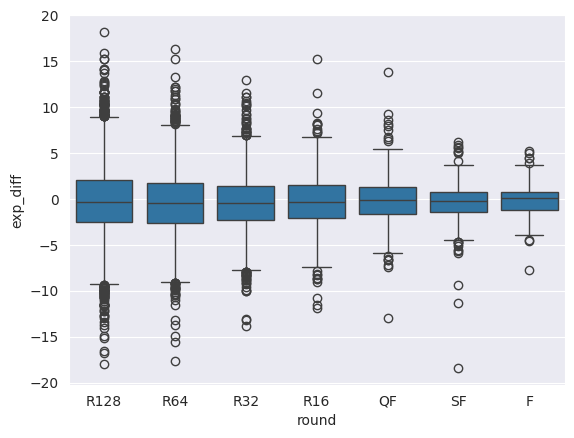

In [70]:
sns.boxplot(x='round', y='exp_diff', data=gdf)
gdf.groupby('round')['exp_diff'].describe().sort_values(by='count', ascending=False)

*Less experienced players win more in early rounds, but experience starts to help deeper into the tournament.*

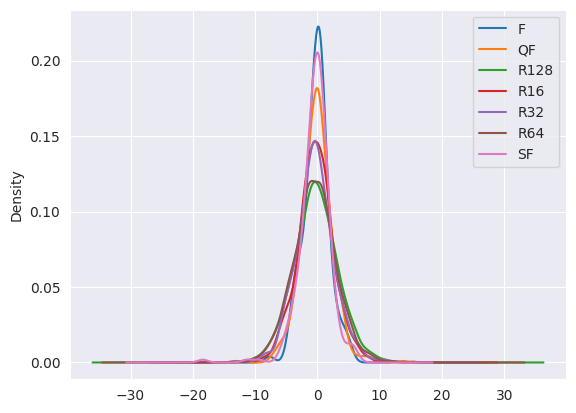

In [71]:
gdf.groupby('round')['exp_diff'].plot(kind='kde', legend=True)
plt.show()

In [72]:
# (H₀): exp_diff distribution is the same across all rounds

pg.kruskal(data=gdf, dv='exp_diff', between='round')

,Source,ddof1,H,p-unc
Kruskal,round,6,14.113943,0.028389


Null Hypothesis (H₀): exp_diff distribution is the same across all rounds

p = 0.028 < 0.05 → Reject H₀

→ Experience difference varies significantly by round

### Serve Performance by Surface

In [ ]:
(df['w_svpt'].replace(0, 1) - df['w_1stIn'].replace(0, 1)).min() # <-- thats causing data error

np.float64(0.0)

In [74]:
gdf['w_1stIn_%'] = df['w_1stIn'] / df['w_svpt'].replace(0, 1)
gdf['w_1stWon_%'] = df['w_1stWon'] / df['w_1stIn'].replace(0, 1)
gdf['w_2ndWon_%'] = df['w_2ndWon'] / (df['w_svpt'].replace(0, 1) - df['w_1stIn'].replace(0, 1))
gdf.head()

,surface,round,player1,w_name,player2,l_name,height_diff,age_diff,rank_diff,rank_point_diff,seed_diff,exp_diff,h2h_diff,w_past_wins,l_past_wins,past_wins_diff,w_1stIn_%,w_1stWon_%,w_2ndWon_%
0,Hard,R128,101222,Stefan Edberg,101432,Dimitri Poliakov,5.0,2.0,161.0,3687.0,-1.0,2.0,0,0,0,0,0.755319,0.746479,0.391304
1,Hard,R128,100995,Eduardo Masso,101242,Brad Pearce,3.0,2.2,-43.0,-175.0,0.0,2.2,0,0,0,0,0.779570,0.613793,0.658537
2,Hard,R128,101138,Pat Cash,101120,Karel Novacek,-7.0,-0.1,-52.0,-413.0,0.0,-0.1,0,0,0,0,0.658537,0.666667,0.642857
3,Hard,R128,100870,Christo Van Rensburg,101256,Mark Kratzmann,7.0,3.6,23.0,79.0,0.0,3.6,0,0,0,0,0.578947,0.750000,0.687500
4,Hard,R128,101731,Nuno Marques,101416,Joao Cunha Silva,17.0,-2.4,12.0,41.0,0.0,-2.4,0,0,0,0,0.751880,0.730000,0.484848


##### Does surface effects winning serve points?

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
Hard,8403.0,0.612247,0.074680,0.353591,0.563132,0.611111,0.661853,1.000000
Clay,4181.0,0.624414,0.081661,0.000000,0.570370,0.623377,0.676056,0.982301
Grass,4082.0,0.629790,0.069006,0.363636,0.582192,0.631579,0.677896,0.866667


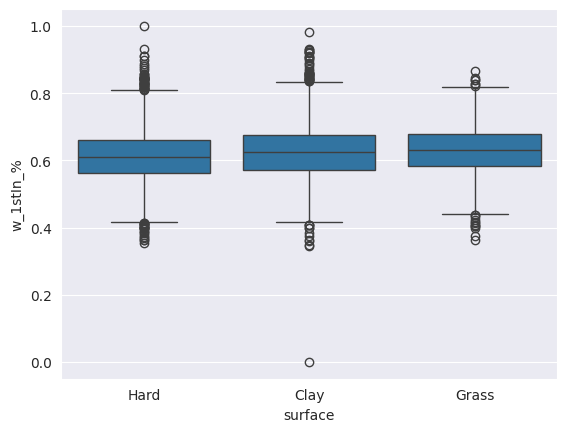

In [75]:
sns.boxplot(x='surface', y='w_1stIn_%', data=gdf)
gdf.groupby('surface')['w_1stIn_%'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
Hard,8402.0,0.550279,0.095254,0.0,0.486926,0.545455,0.609661,1.000000
Clay,4180.0,0.553002,0.097649,0.0,0.488372,0.548387,0.612245,1.615385
Grass,4082.0,0.552869,0.097561,0.0,0.488372,0.550000,0.615385,1.000000


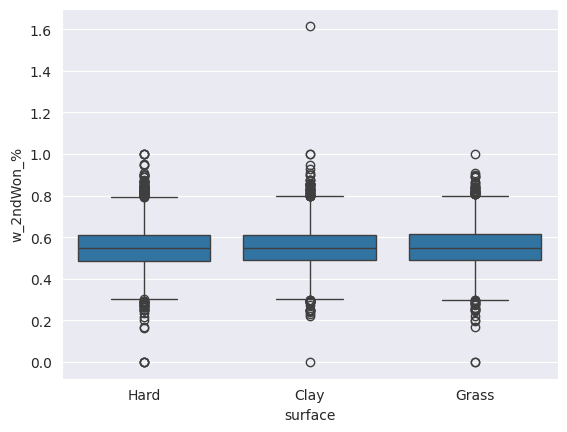

In [77]:
sns.boxplot(x='surface', y='w_2ndWon_%', data=gdf)
gdf.groupby('surface')['w_2ndWon_%'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
Hard,8403.0,0.771798,0.071794,0.333333,0.722892,0.771429,0.821429,1.0
Clay,4181.0,0.741951,0.075277,0.000000,0.690476,0.740260,0.791667,1.0
Grass,4082.0,0.794863,0.069903,0.571429,0.746988,0.794521,0.843137,1.0


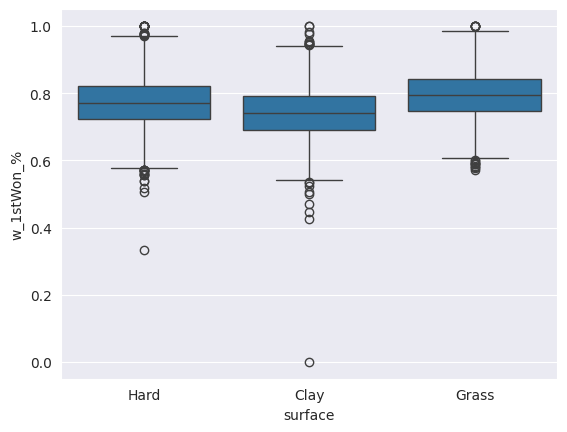

In [76]:
sns.boxplot(x='surface', y='w_1stWon_%', data=gdf)
gdf.groupby('surface')['w_1stWon_%'].describe().sort_values(by='count', ascending=False)

*Surface does effect winning first serve point. Grass has highest w_1stWin_% (grass > hard > clay)
<br>extreme outliers are data errors.*